# Lab 1: Pandas Fundamentals with Earthquake Data

In this assignment, we will review pandas fundamentals, such as how to

- Open csv files
- Manipulate dataframe indexes
- Parse date columns
- Examine basic dataframe statistics
- Manipulate text columns and extract values
- Plot dataframe contents using
  - Bar charts
  - Histograms
  - Scatter plots

First, import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Data for this assignment in .csv format downloaded from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/) is available at:

https://raw.githubusercontent.com/earth-DS-ML/summer_2025/refs/heads/main/lectures_DS/data/usgs_earthquakes_2025.csv

You don't need to download this file. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this URL to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/earth-DS-ML/summer_2025/refs/heads/main/lectures_DS/data/usgs_earthquakes_2025.csv', parse_dates=['time'], index_col='id')

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
id,,,,,,,,,,,,,,,,,,,,,
us6000qkt1,2025-06-17 12:00:22.773000+00:00,-23.164500,-175.354900,10.0,4.90,mb,22.0,166.00,6.4810,0.4900,...,2025-06-17T12:30:04.040Z,"206 km SSW of ‘Ohonua, Tonga",earthquake,15.85,1.938,0.093,36.0,reviewed,us,us
nn00899047,2025-06-17 11:04:43.352000+00:00,41.123400,-116.258400,3.7,2.70,ml,7.0,79.84,0.1590,0.1459,...,2025-06-17T11:28:44.047Z,"47 km NNW of Carlin, Nevada",earthquake,NaN,4.400,0.260,4.0,reviewed,nn,nn
us6000qksf,2025-06-17 09:16:30.483000+00:00,-23.118100,-174.912900,10.0,4.80,mb,16.0,111.00,6.1510,0.4800,...,2025-06-17T10:43:17.040Z,"196 km S of ‘Ohonua, Tonga",earthquake,14.94,1.939,0.148,14.0,reviewed,us,us
nn00899041,2025-06-17 09:09:53.314000+00:00,41.114300,-116.292400,1.7,3.20,ml,16.0,63.95,0.1370,0.1140,...,2025-06-17T09:53:55.755Z,"47 km NNW of Carlin, Nevada",earthquake,NaN,2.300,0.230,10.0,reviewed,nn,nn
nc75196741,2025-06-17 08:40:41.280000+00:00,38.046333,-118.785333,10.4,2.93,md,39.0,67.00,0.2282,0.0500,...,2025-06-17T09:41:06.390Z,"27 km SE of Bodie, CA",earthquake,0.24,1.030,0.160,40.0,reviewed,nc,nc


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

Verify that this worked using the `head` and `info` functions.


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/earth-DS-ML/summer_2025/refs/heads/main/lectures_DS/data/usgs_earthquakes_2025.csv', parse_dates=['time'], index_col='id')

In [6]:
df =df.set_index('time')
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,
2025-06-17 12:00:22.773000+00:00,-23.164500,-175.354900,10.0,4.90,mb,22.0,166.00,6.4810,0.4900,us,2025-06-17T12:30:04.040Z,"206 km SSW of ‘Ohonua, Tonga",earthquake,15.85,1.938,0.093,36.0,reviewed,us,us
2025-06-17 11:04:43.352000+00:00,41.123400,-116.258400,3.7,2.70,ml,7.0,79.84,0.1590,0.1459,nn,2025-06-17T11:28:44.047Z,"47 km NNW of Carlin, Nevada",earthquake,NaN,4.400,0.260,4.0,reviewed,nn,nn
2025-06-17 09:16:30.483000+00:00,-23.118100,-174.912900,10.0,4.80,mb,16.0,111.00,6.1510,0.4800,us,2025-06-17T10:43:17.040Z,"196 km S of ‘Ohonua, Tonga",earthquake,14.94,1.939,0.148,14.0,reviewed,us,us
2025-06-17 09:09:53.314000+00:00,41.114300,-116.292400,1.7,3.20,ml,16.0,63.95,0.1370,0.1140,nn,2025-06-17T09:53:55.755Z,"47 km NNW of Carlin, Nevada",earthquake,NaN,2.300,0.230,10.0,reviewed,nn,nn
2025-06-17 08:40:41.280000+00:00,38.046333,-118.785333,10.4,2.93,md,39.0,67.00,0.2282,0.0500,nc,2025-06-17T09:41:06.390Z,"27 km SE of Bodie, CA",earthquake,0.24,1.030,0.160,40.0,reviewed,nc,nc


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [7]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10654.000000,10654.000000,10654.000000,10654.000000,9919.000000,9919.000000,9918.000000,10654.000000,9820.000000,10653.000000,9868.000000,9909.000000
mean,19.480071,-27.702737,62.060599,3.864279,43.145378,134.090393,2.434296,0.615406,6.947442,4.411837,0.113816,36.508629
std,31.231385,125.968773,110.250304,0.854359,37.794869,71.401092,4.100662,0.284075,4.395204,4.907911,0.055055,52.030189
min,-73.220400,-179.993300,-2.950000,2.500000,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.095700,-151.755725,10.000000,3.000000,19.000000,76.000000,0.501000,0.420000,3.940000,1.841027,0.078000,12.000000
50%,23.175050,-67.340900,14.565000,4.200000,31.000000,121.000000,1.294500,0.620000,6.680000,1.978000,0.105000,20.000000
75%,47.420125,120.648275,63.054000,4.500000,53.000000,187.000000,2.669500,0.810000,9.760000,6.697000,0.139000,40.000000
max,87.027900,179.985500,667.237000,7.700000,475.000000,358.180000,52.015000,1.860000,40.010000,41.322000,0.730000,892.000000


### 4) Use `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [10]:
df.nlargest(n=20, columns=['mag'])

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,
2025-03-28 06:20:52.715000+00:00,22.0110,95.9363,10.000,7.7,mww,246.0,24.0,3.474,0.89,us,2025-06-16T19:10:14.405Z,"2025 Mandalay, Burma (Myanmar) Earthquake",earthquake,7.63,1.719,0.028,121.0,reviewed,us,us
2025-02-08 23:23:14.697000+00:00,17.6506,-82.3950,14.326,7.6,mww,235.0,18.0,4.662,0.62,us,2025-04-26T15:51:49.572Z,"210 km SSW of George Town, Cayman Islands",earthquake,6.99,3.216,0.028,119.0,reviewed,us,us
2025-05-02 12:58:26.014000+00:00,-56.8094,-68.1019,10.000,7.4,mww,284.0,20.0,1.900,0.75,us,2025-06-06T12:21:50.736Z,2025 Drake Passage Earthquake,earthquake,7.58,1.441,0.038,68.0,reviewed,us,us
2025-03-30 12:18:50.362000+00:00,-20.3036,-174.0718,29.000,7.0,mww,287.0,20.0,4.091,0.96,us,2025-06-06T21:12:28.040Z,"61 km SSE of Pangai, Tonga",earthquake,4.83,2.971,0.031,98.0,reviewed,us,us
2025-04-04 20:04:38.129000+00:00,-6.3025,151.6257,9.000,6.9,mww,333.0,11.0,2.022,0.78,us,2025-06-09T13:38:40.040Z,"184 km ESE of Kimbe, Papua New Guinea",earthquake,5.87,1.699,0.028,121.0,reviewed,us,us
2025-04-03 14:09:29.739000+00:00,52.4538,-32.1071,10.000,6.9,mww,165.0,19.0,11.349,0.57,us,2025-06-09T13:38:39.040Z,Reykjanes Ridge,earthquake,8.40,1.762,0.031,99.0,reviewed,us,us
2025-04-29 14:53:37.897000+00:00,-54.2616,155.6446,18.957,6.8,mww,475.0,11.0,1.942,0.51,us,2025-05-22T13:59:03.231Z,Macquarie Island region,earthquake,7.93,2.668,0.044,49.0,reviewed,us,us
2025-01-13 12:19:32.252000+00:00,31.8326,131.5525,39.000,6.8,mww,151.0,18.0,0.992,1.07,us,2025-03-20T20:55:21.040Z,"15 km SE of Miyazaki, Japan",earthquake,3.70,1.827,0.033,87.0,reviewed,us,us
2025-03-28 06:32:04.777000+00:00,21.6975,95.9690,10.000,6.7,mww,106.0,41.0,4.266,0.75,us,2025-06-06T21:12:25.040Z,Burma (Myanmar),earthquake,7.64,1.831,0.089,12.0,reviewed,us,us


Examine the structure of the `place` column. The state / country information seems to be in there. How would you get it out?

### 5) Extract the state or country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe called `country`. Note that some of the "countries" are actually U.S. states.

In [11]:
df.place

time
2025-06-17 12:00:22.773000+00:00      206 km SSW of ‘Ohonua, Tonga
2025-06-17 11:04:43.352000+00:00       47 km NNW of Carlin, Nevada
2025-06-17 09:16:30.483000+00:00        196 km S of ‘Ohonua, Tonga
2025-06-17 09:09:53.314000+00:00       47 km NNW of Carlin, Nevada
2025-06-17 08:40:41.280000+00:00             27 km SE of Bodie, CA
                                                 ...              
2025-01-10 00:49:27.075000+00:00          79 km SE of Adak, Alaska
2025-01-10 00:33:23.897000+00:00       37 km SSE of Egegik, Alaska
2025-01-10 00:30:10.096000+00:00     south of the Kermadec Islands
2025-01-10 00:17:25.435000+00:00       41 km SSE of Egegik, Alaska
2025-01-10 00:15:53.054000+00:00    17 km NW of Metahāra, Ethiopia
Name: place, Length: 10654, dtype: object

In [14]:
df.place.str.split(', ').str[-1]

time
2025-06-17 12:00:22.773000+00:00                            Tonga
2025-06-17 11:04:43.352000+00:00                           Nevada
2025-06-17 09:16:30.483000+00:00                            Tonga
2025-06-17 09:09:53.314000+00:00                           Nevada
2025-06-17 08:40:41.280000+00:00                               CA
                                                ...              
2025-01-10 00:49:27.075000+00:00                           Alaska
2025-01-10 00:33:23.897000+00:00                           Alaska
2025-01-10 00:30:10.096000+00:00    south of the Kermadec Islands
2025-01-10 00:17:25.435000+00:00                           Alaska
2025-01-10 00:15:53.054000+00:00                         Ethiopia
Name: place, Length: 10654, dtype: object

In [15]:
df['country'] = df.place.str.split(', ').str[-1]

### 6) Display each unique value from the new column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [19]:
unique_countries = df.country.unique()

In [20]:
len(unique_countries)

228

### 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [21]:
df_large = df[df.mag>=4]

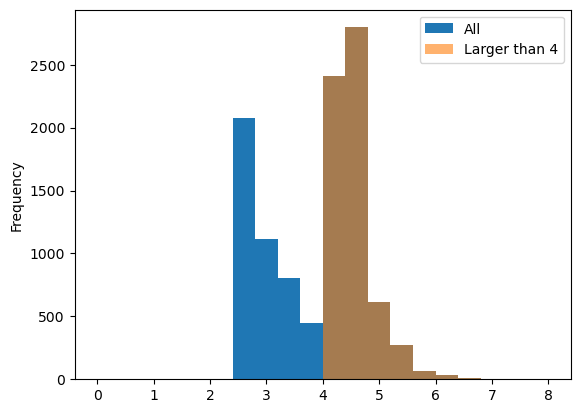

In [28]:
df.mag.plot.hist(bins=np.linspace(0,8, 21), label='All')
df_large.mag.plot.hist(bins=np.linspace(0,8, 21),label='Larger than 4',alpha=0.6)
plt.legend()

### 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

Location name on the x axis, Earthquake count on the y axis

<Axes: xlabel='country'>

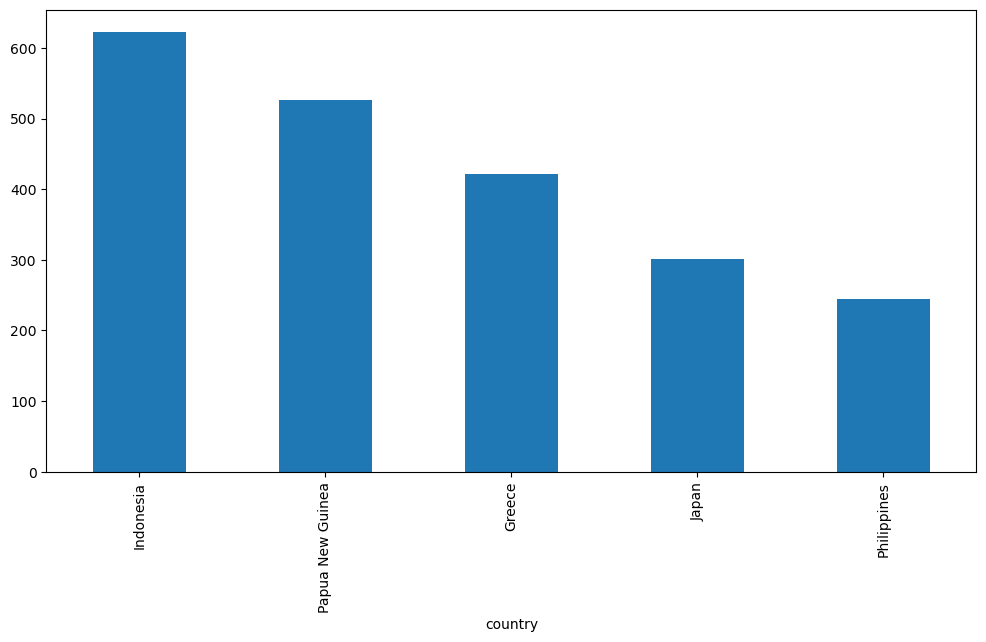

In [30]:
df_large.groupby('country').mag.count().nlargest(5).plot(kind='bar', figsize=(12,6))

### 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset.
Use a Logarithmic scale. What sort of relationship do you see?

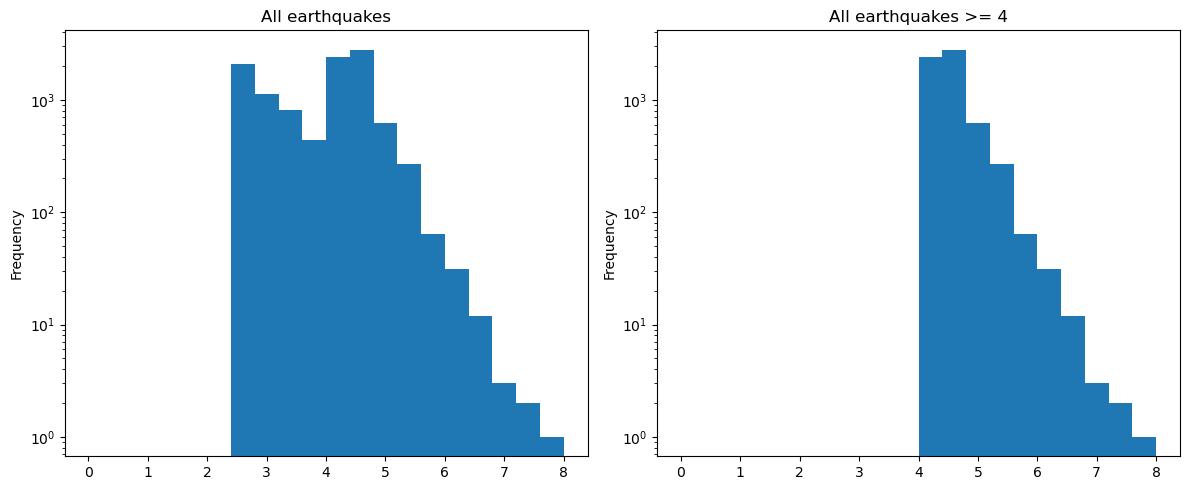

In [33]:
plt.figure(figsize=(12,5))

plt.subplot(121)
df.mag.plot.hist(bins=np.linspace(0,8, 21), label='All')
plt.yscale('log')
plt.title('All earthquakes')

plt.subplot(122)
df_large.mag.plot.hist(bins=np.linspace(0,8, 21),label='Larger than 4')
plt.yscale('log')
plt.title('All earthquakes >= 4')

plt.tight_layout()

### 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

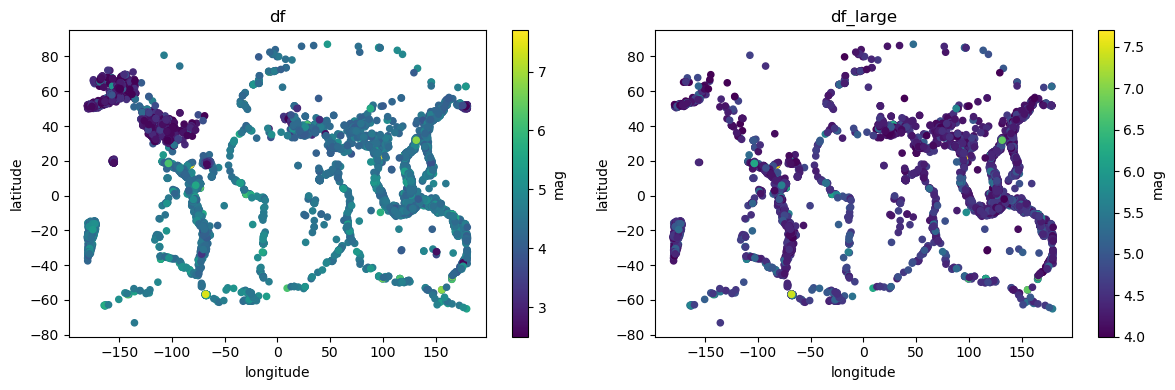

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(121)
df.plot.scatter(x='longitude', y='latitude', c='mag', cmap='viridis', colorbar=True, ax=plt.gca())
plt.title('df')

plt.subplot(122)
df_large.plot.scatter(x='longitude', y='latitude', c='mag', cmap='viridis', colorbar=True, ax=plt.gca())
plt.title('df_large')

plt.tight_layout()
